## exploration for data pulled from chicago tattoo artists instagram accounts

In [13]:
import os
import json
import pandas as pd
from IPython.display import Image
import csv

In [3]:
# create dictionary from artis/shop .json files

fname = '/Users/kylefrankovich/Desktop/insight_project_data/feralcatbox/feralcatbox.json'
data = json.load(open(fname))
len(data)

10

In [10]:
data[3]

{'__typename': 'GraphImage',
 'comments_disabled': False,
 'dimensions': {'height': 1080, 'width': 1080},
 'display_url': 'https://scontent-atl3-1.cdninstagram.com/vp/28607fb4ca62fc1cfe265fecffd76904/5AE6B6C4/t51.2885-15/e35/26066485_169583613655603_4826747482048299008_n.jpg',
 'edge_media_preview_like': {'count': 8208},
 'edge_media_to_caption': {'edges': [{'node': {'text': 'The feeling when you’re nearing the end of a backpiece...🙆🏼\u200d♀️😭'}}]},
 'edge_media_to_comment': {'count': 95},
 'id': '1688863624193359502',
 'is_video': False,
 'location': {'has_public_page': True,
  'id': '1017368811',
  'name': 'Black Oak Tattoo',
  'slug': 'black-oak-tattoo'},
 'owner': {'id': '13743730'},
 'shortcode': 'BdwDISqH76O',
 'tags': [],
 'taken_at_timestamp': 1515548254,
 'thumbnail_resources': [{'config_height': 150,
   'config_width': 150,
   'src': 'https://scontent-atl3-1.cdninstagram.com/vp/b2cf59e42e5e59e7815b27b15f9077a0/5AFEDBA1/t51.2885-15/s150x150/e35/26066485_169583613655603_4826747

artist:
image URL: https://scontent-atl3-1.cdninstagram.com/vp/6a11a5285685ef6bed54900926b7fd07/5AE1CD5A/t51.2885-15/e35/26869943_1543950475719283_2515456233805185024_n.jpg
number of likes: 36
caption: Zzzzzing
tags: []
shortcode: BeBky6Slc67


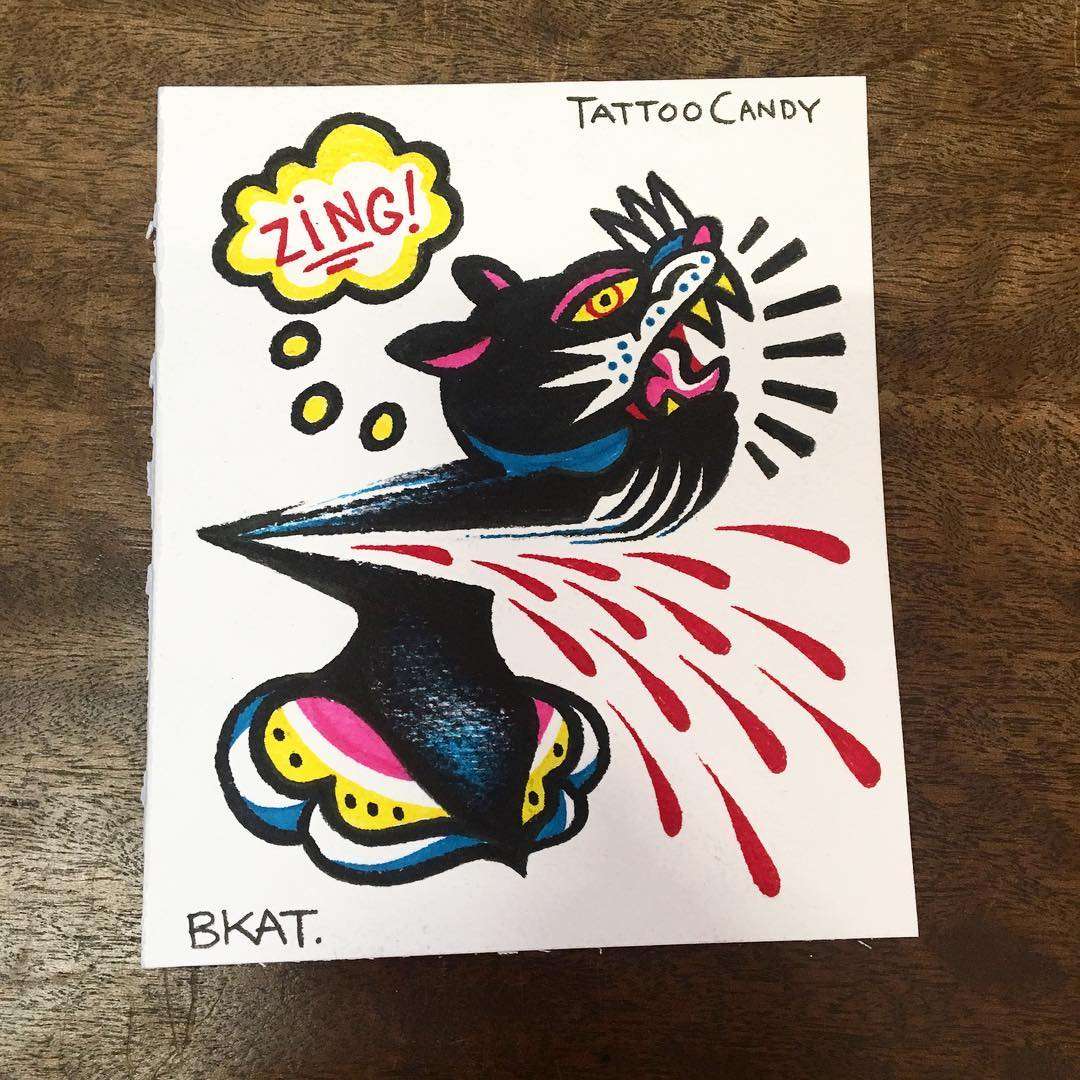

In [90]:
i = 3
print('artist:', )
print('image URL:',data[i]['display_url'])
print('number of likes:', data[i]['edge_media_preview_like']['count'])
print('caption:', data[i]['edge_media_to_caption']['edges'][0]['node']['text'])
print('tags:',data[i]['tags'])
print('shortcode:',data[i]['shortcode'])
Image(data[i]['display_url'], width=600)

In [92]:
# https://www.instagram.com/p/BeBwOoND4Cc/
insta_url = 'https://www.instagram.com/p/'
data[i]['shortcode']
insta_url + data[i]['shortcode']

'https://www.instagram.com/p/BeBky6Slc67'

In [93]:
rootdir = '/Users/kylefrankovich/Desktop/insight_project_data'

rows_list = []
insta_url = 'https://www.instagram.com/p/'

for root, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith('.json'):
            current_account_data = json.load(open(os.path.join(root, file))) # load current account .json (shop or artist)
            account_name = os.path.basename(root)
            print('processing account:', account_name)
            for post in current_account_data: # loop throough all posts for account
                temp_dict = {}
                temp_dict['account'] = account_name
                temp_dict['URL'] = post['display_url']
                temp_dict['link_to_post'] = insta_url + post['shortcode']
                temp_dict['likes'] = post['edge_media_preview_like']['count']
                if 'tags' in post.keys():
                    temp_dict['tags'] = post['tags']
                else:
                    temp_dict['tags'] = []
                if post['edge_media_to_caption']['edges']:
                    temp_dict['caption'] = post['edge_media_to_caption']['edges'][0]['node']['text']
                else: 
                    temp_dict['caption'] = 'no caption'
                
                rows_list.append(temp_dict)

df = pd.DataFrame(rows_list)

processing account: junkyardchicago
processing account: oldirtybadkat
processing account: deluxetattoochicago
processing account: cali_sefora
processing account: jake_ames
processing account: mariodesatattoo
processing account: tattoounion
processing account: chipdouglastattoo
processing account: troytaylor
processing account: revolutiontattoo
processing account: jamsandjammers
processing account: stencilstuff
processing account: donnaklein
processing account: outofstepbooks
processing account: piercingbyoscar
processing account: ashleywolly
processing account: allisonminorpiercing
processing account: bobbyearly
processing account: joshua_meadows_tattoo
processing account: nkemr
processing account: intenzetattooink
processing account: familytattoo
processing account: nathanieltinker
processing account: jacobkearney
processing account: inkhartreg
processing account: thetattooerspodcast
processing account: dh_rivera
processing account: chicagotattoo
processing account: greatlakestattoo
p

In [94]:
print('number of images:',len(df))
print('number of unique accounts:',len(df['account'].unique()))
print('most likes:', max(df['likes']))

number of images: 2288
number of unique accounts: 231
most likes: 656460


In [95]:
df.head()

,URL,account,caption,likes,link_to_post,tags
0,https://scontent-atl3-1.cdninstagram.com/vp/ac...,junkyardchicago,Tag @vans in the comments below. 🤣 #vans #flas...,2918,https://www.instagram.com/p/BeE2JPjAXnT,"[gotsomemoreofthemdecks, skate, vans, illustra..."
1,https://scontent-atl3-1.cdninstagram.com/vp/15...,junkyardchicago,EMPTY INSIDE. #ghost #emptyinside #design #ts...,2361,https://www.instagram.com/p/BeEJkMZlkk8,"[design, illustration, tshirtdesign, emptyinsi..."
2,https://scontent-atl3-1.cdninstagram.com/vp/61...,junkyardchicago,Alley cat but this time with a black backgroun...,2173,https://www.instagram.com/p/Bd_yMqdgItb,"[chicagoartist, alleycat, cat, illustration, c..."
3,https://scontent-atl3-1.cdninstagram.com/vp/4c...,junkyardchicago,Hi. Look under my ghost cloak. #ghost #chica...,4171,https://www.instagram.com/p/Bd1YOszA4QI,"[chicagoartist, illustration, ghost, darkart, ..."
4,https://scontent-atl3-1.cdninstagram.com/vp/46...,junkyardchicago,The fuel of life. #coffee #chicagoartist #ill...,2845,https://www.instagram.com/p/Bd0OrLGg1Oi,"[chicagoartist, tattoo, illustration, coffee, ..."


In [96]:
df.describe()

,likes
count,2288.000000
mean,2477.489510
std,29445.539446
min,3.000000
25%,54.000000
50%,100.000000
75%,219.000000
max,656460.000000


In [106]:
top_posts = df.sort_values(by='likes', ascending=False).head(50)
top_posts

,URL,account,caption,likes,link_to_post,tags
1633,https://scontent-atl3-1.cdninstagram.com/vp/88...,g_eazy,Rowdy night in NYC last night somehow ended up...,656460,https://www.instagram.com/p/Bd9Rtv-n6Bg,[]
1748,https://scontent-atl3-1.cdninstagram.com/vp/97...,marvel,"Suit up for Marvel Studios' #AntManAndTheWasp,...",615883,https://www.instagram.com/p/BeCGBFHHmKC,[AntManAndTheWasp]
1636,https://scontent-atl3-1.cdninstagram.com/vp/80...,g_eazy,New York New York big city of dreams...,492537,https://www.instagram.com/p/Bd3pWiQnbkY,[]
1632,https://scontent-atl3-1.cdninstagram.com/vp/cd...,g_eazy,The Beautiful & Damned Tour starts in a month....,485669,https://www.instagram.com/p/BeBX8zmH04H,[]
1639,https://scontent-atl3-1.cdninstagram.com/vp/e5...,g_eazy,"4 weeks later the albums still going strong, t...",434683,https://www.instagram.com/p/Bd0pWKrH0Dq,[]
1634,https://scontent-atl3-1.cdninstagram.com/vp/2f...,g_eazy,Live from NYC it's Saturday nite! Yeeee!,379013,https://www.instagram.com/p/Bd7ZL0XHBOS,[]
1638,https://scontent-atl3-1.cdninstagram.com/vp/14...,g_eazy,Happy birthday to my brother the young Bay Are...,363251,https://www.instagram.com/p/Bd1E5_OnRb_,[]
1637,https://scontent-atl3-1.cdninstagram.com/vp/b3...,g_eazy,"Tapped in with the Breakfast club, interview o...",249056,https://www.instagram.com/p/Bd21H91Hlgr,[]
1630,https://scontent-atl3-1.cdninstagram.com/vp/e6...,g_eazy,The Beautiful and Damned journey began at the ...,241568,https://www.instagram.com/p/BeEISnAn1LX,[DiveBarTour]
1631,https://scontent-atl3-1.cdninstagram.com/vp/ce...,g_eazy,Coming soon... @stillhouseusa 🥃🖤😈,202857,https://www.instagram.com/p/BeBwOwbnHL5,[]


In [105]:
print(top_posts.iloc[19]['link_to_post'])

https://www.instagram.com/p/BeB56DIFm_j


In [107]:
accounts_to_filter = ['g_easy', 'marvel', 'popsockets',
                     'readyplayerone', 'junkyardchicago',
                     ]

In [109]:
?df[~df.countries.isin(countries)]
df[~df.account.isin(accounts_to_filter)]

,URL,account,caption,likes,link_to_post,tags
0,https://scontent-atl3-1.cdninstagram.com/vp/ac...,junkyardchicago,Tag @vans in the comments below. 🤣 #vans #flas...,2918,https://www.instagram.com/p/BeE2JPjAXnT,"[gotsomemoreofthemdecks, skate, vans, illustra..."
1,https://scontent-atl3-1.cdninstagram.com/vp/15...,junkyardchicago,EMPTY INSIDE. #ghost #emptyinside #design #ts...,2361,https://www.instagram.com/p/BeEJkMZlkk8,"[design, illustration, tshirtdesign, emptyinsi..."
2,https://scontent-atl3-1.cdninstagram.com/vp/61...,junkyardchicago,Alley cat but this time with a black backgroun...,2173,https://www.instagram.com/p/Bd_yMqdgItb,"[chicagoartist, alleycat, cat, illustration, c..."
3,https://scontent-atl3-1.cdninstagram.com/vp/4c...,junkyardchicago,Hi. Look under my ghost cloak. #ghost #chica...,4171,https://www.instagram.com/p/Bd1YOszA4QI,"[chicagoartist, illustration, ghost, darkart, ..."
4,https://scontent-atl3-1.cdninstagram.com/vp/46...,junkyardchicago,The fuel of life. #coffee #chicagoartist #ill...,2845,https://www.instagram.com/p/Bd0OrLGg1Oi,"[chicagoartist, tattoo, illustration, coffee, ..."
5,https://scontent-atl3-1.cdninstagram.com/vp/61...,junkyardchicago,Hairy floater. One of my favorite positions t...,2758,https://www.instagram.com/p/BdwRLOzAdLn,"[chicagoartist, drawing, illustration, float, ..."
6,https://scontent-atl3-1.cdninstagram.com/vp/f4...,junkyardchicago,Back to work. #chicagoartist #illustration #s...,2089,https://www.instagram.com/p/BdsqVg6gUTl,"[pen, chicagoartist, tattoo, illustration, snake]"
7,https://scontent-atl3-1.cdninstagram.com/vp/06...,junkyardchicago,Figured this would be a good first post of the...,2218,https://www.instagram.com/p/BddOfWrgqDO,"[chicagoartist, drawing, illustration, moster,..."
8,https://scontent-atl3-1.cdninstagram.com/vp/8b...,junkyardchicago,Have a good NYE everyone! Cheers 🥂. Here's a ...,2543,https://www.instagram.com/p/BdYjfYYgIqX,"[chicagoartist, 2018, cheers, thisisstolen, NYE]"
9,https://scontent-atl3-1.cdninstagram.com/vp/7b...,junkyardchicago,Throwback to not so long ago when I made a tat...,4017,https://www.instagram.com/p/BdRV6bhgR5L,"[flashtattoo, chicagoartist, tattoo]"


In [110]:
len(df)

2288